## 11.10. Adam算法

### 11.10.2. 实现

In [1]:
%matplotlib inline
import mindspore
from d2l import mindspore as d2l


def init_adam_states(feature_dim):
    v_w, v_b = d2l.zeros((feature_dim, 1)), d2l.zeros(1)
    s_w, s_b = d2l.zeros((feature_dim, 1)), d2l.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, grads, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s), grad in zip(params, states, grads):
        v[:] = beta1 * v + (1 - beta1) * grad
        s[:] = beta2 * s + (1 - beta2) * d2l.square(grad)
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        mindspore.ops.assign_sub(p, hyperparams['lr'] * v_bias_corr / (d2l.sqrt(s_bias_corr)  + eps))
    hyperparams['t'] += 1

loss: 0.244, 0.142 sec/epoch


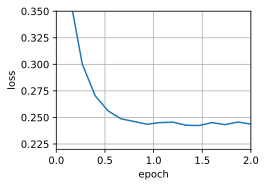

In [2]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);

loss: 0.247, 0.100 sec/epoch


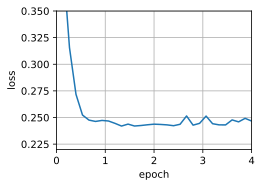

In [3]:
trainer = mindspore.nn.Adam
d2l.train_concise_ch11(trainer, {'learning_rate': 0.01}, data_iter)

### 11.10.3. Yogi

loss: 0.246, 0.211 sec/epoch


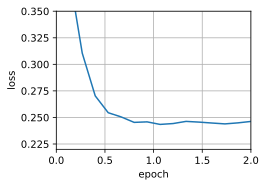

In [4]:
def yogi(params, grads, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-3
    for p, (v, s), grad in zip(params, states, grads):

            v[:] = beta1 * v + (1 - beta1) * grad
            s[:] = s + (1 - beta2) * d2l.sign(
                d2l.square(grad) - s) * d2l.square(grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (d2l.sqrt(s_bias_corr)
                                                       + eps)
    hyperparams['t'] += 1

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(yogi, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);